##  Import Required Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# from sklearn import preprocessing

## Load the Housing Dataset


In [44]:
columns = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
    "RAD","TAX","PTRATIO","B","LSTAT","MEDV"
]
data = pd.read_csv("house_price_Data_Set.csv", sep='\s+', names=columns)
data.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ys/lyk27gb57xg1t_nx58j46dbc0000gp/T/ipykernel_3126/174013372.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("house_price_Data_Set.csv", sep='\s+', names=columns)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Overview 

In [45]:
print(data.shape)
print(data.info())

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


## Handling missing data

In [46]:
print(data.isnull().sum())
print(data.duplicated())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool


# Exploratory Data Analysis (EDA)


#### (a) Unique Values

In [47]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

#### (b) Summary Statistics

In [48]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Outlier Detection

#### (a) Boxplots
Visualize outliers for each feature.

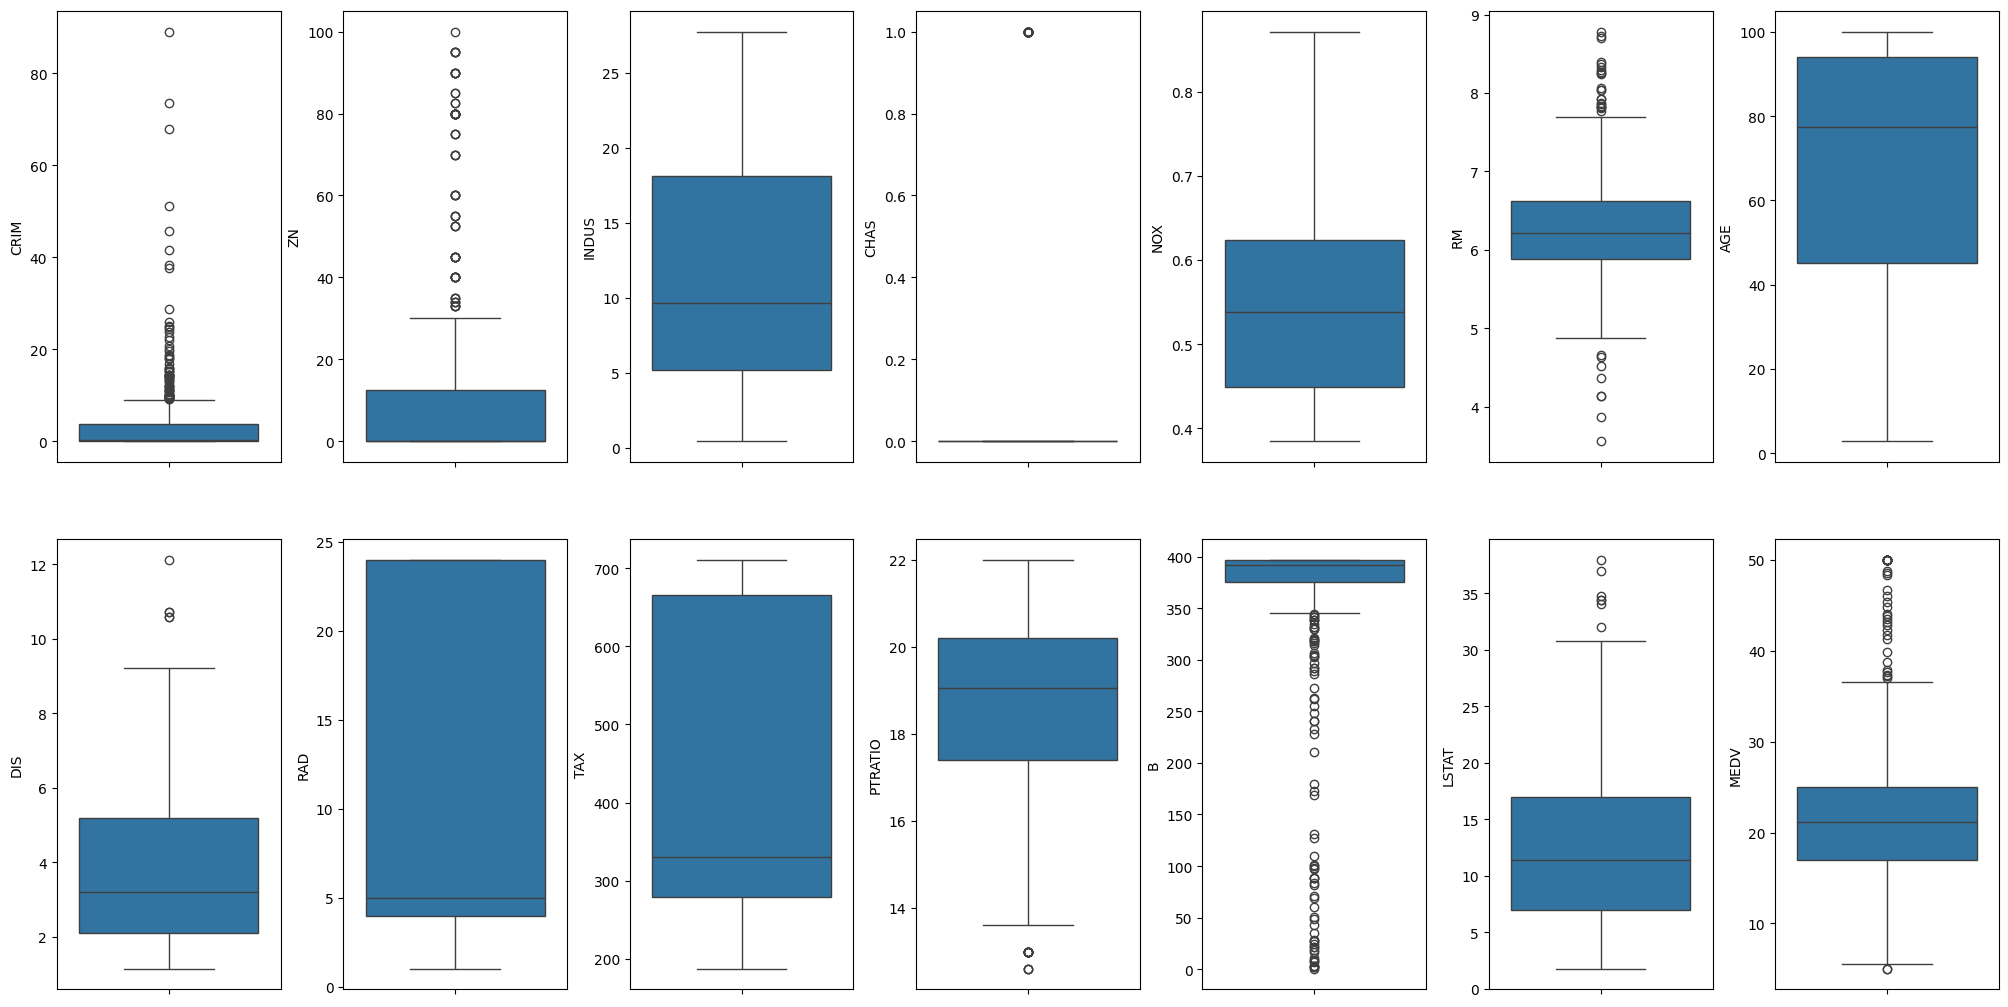

In [49]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers.

#### (b) Outlier Percentage

Quantify how many outliers each feature has.

Informs whether outlier handling (transformation/removal) is needed.

In [50]:
#see the outliers percentage in every column.
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


### Target Variable (MEDV) Distribution

This plot helps to understand the spread and skewness of house prices in the dataset, and to identify any potential outliers or capped values.

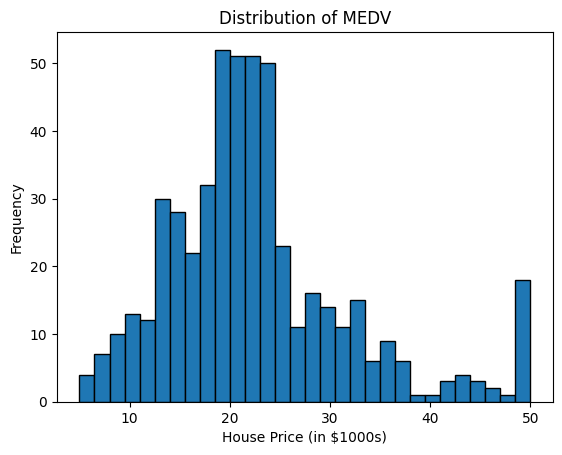

In [51]:
plt.hist(data['MEDV'], bins=30, edgecolor='k')
plt.xlabel('House Price (in $1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

<Axes: xlabel='MEDV'>

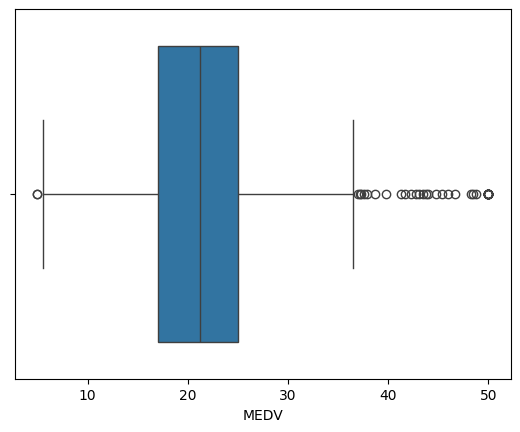

In [52]:
sns.boxplot(x=data['MEDV'])

50.0


<Axes: >

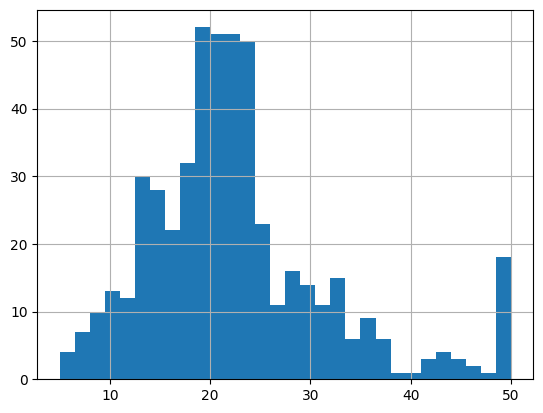

In [53]:
print(data['MEDV'].max())
sum(data['MEDV'] == 50)
data['MEDV'].hist(bins=30)


The values are capped are 50. 

### Remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [54]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


## Features distributions

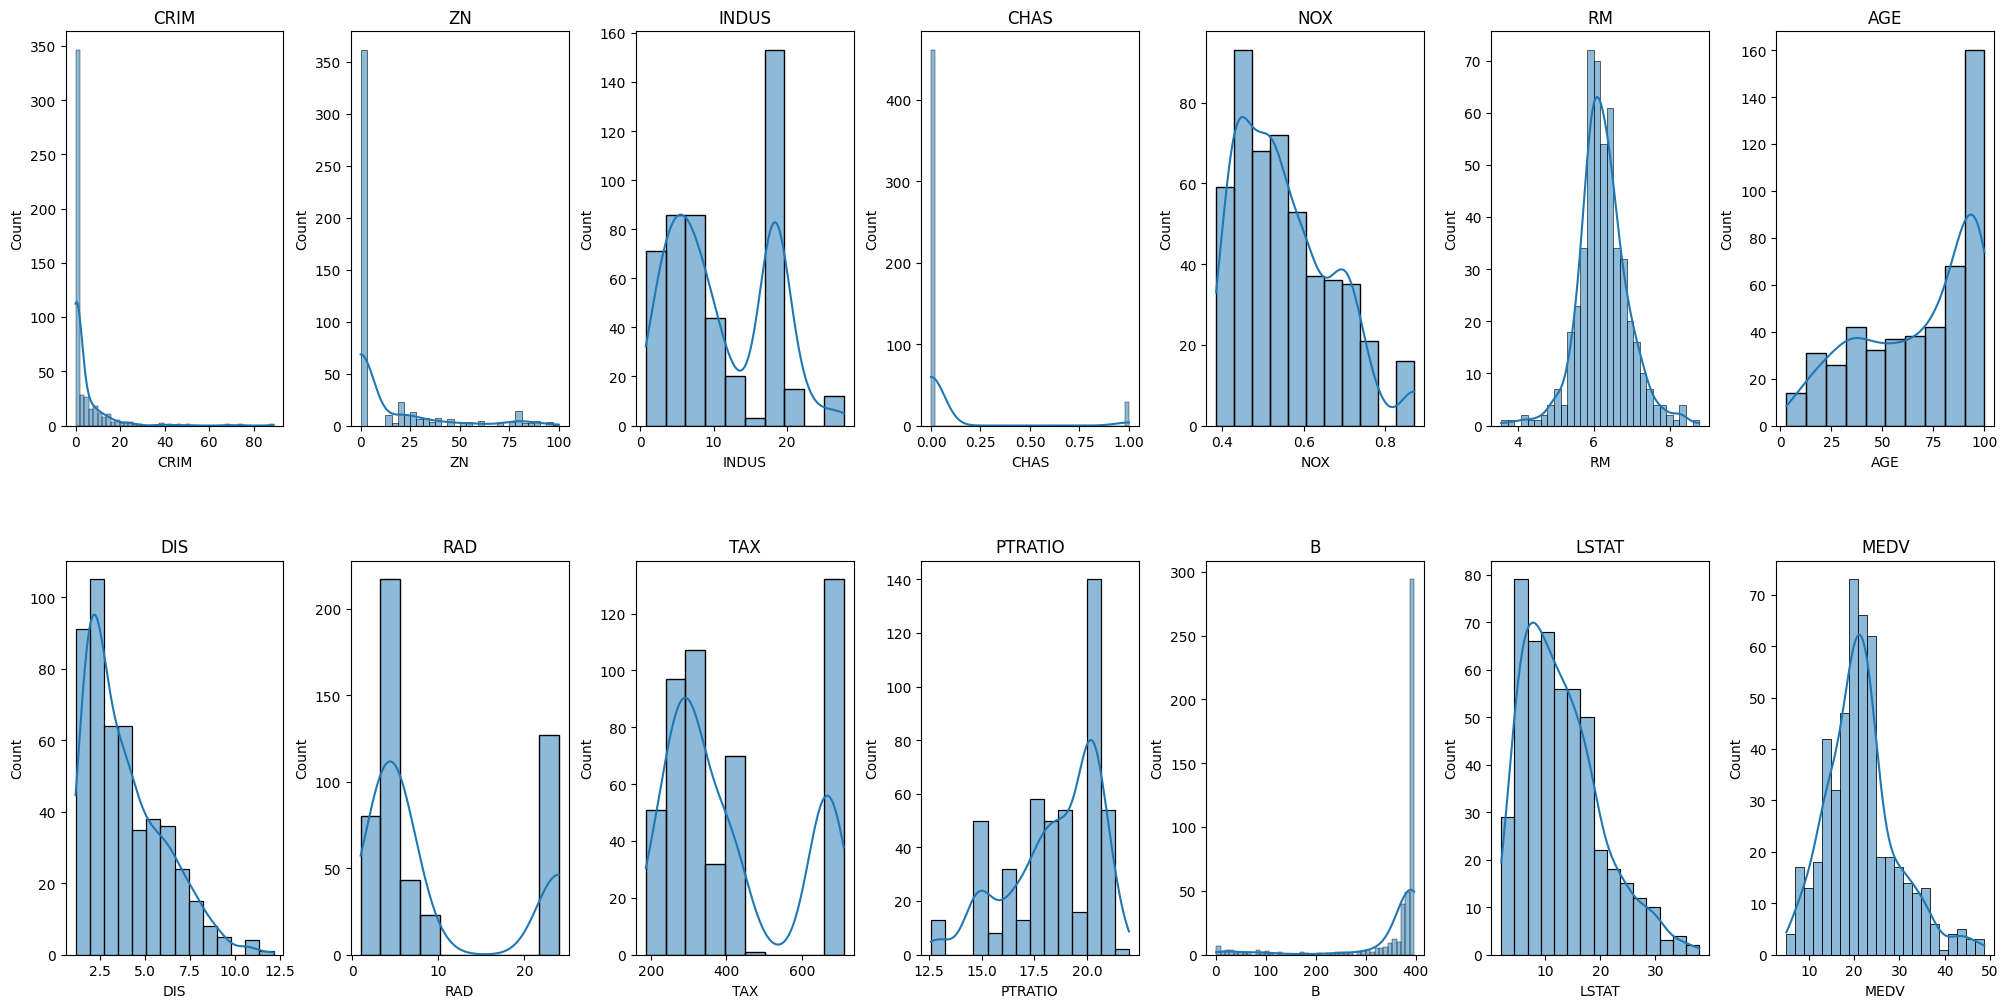

In [55]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for index, (k, v) in enumerate(data.items()):
    sns.histplot(v, kde=True, ax=axs[index])
    axs[index].set_title(k)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


### Observations & Inferences – Distributions
- **RM (average rooms per dwelling)** is approximately normally distributed.
- **CRIM, DIS, LSTAT** are right-skewed, requiring transformation (log).
- **AGE and PTRATIO** are moderately skewed but acceptable for regression.
- **TAX and RAD** show bimodal distributions, suggesting categorical-like behavior.

**Inference**: Log transformation is applied to skewed features (CRIM, ZN, LSTAT, DIS, NOX) for better linear model fit.


## Correlation Analysis


In [56]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

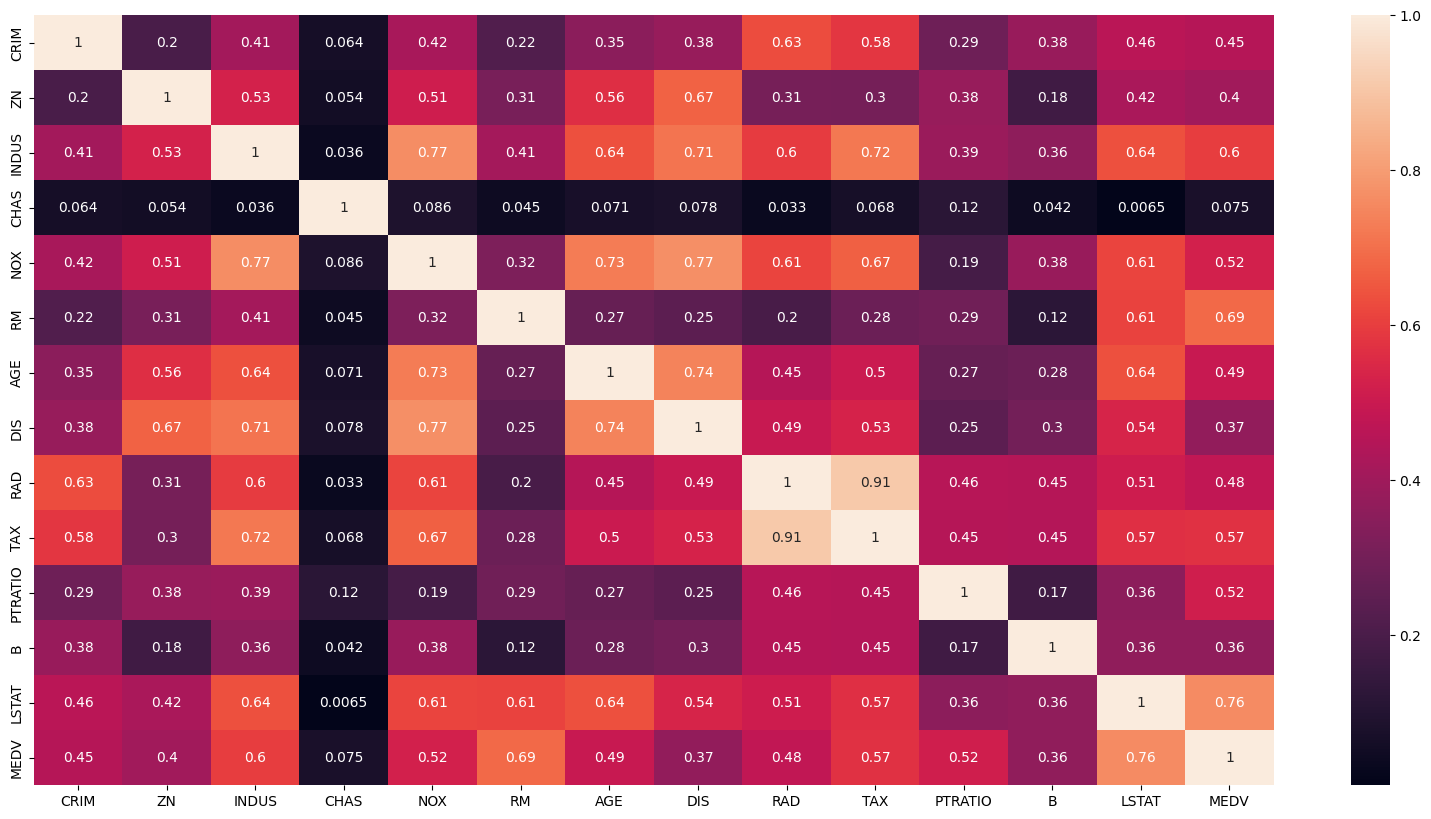

In [57]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [58]:
data.corr()['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.686634
ZN         0.404608
DIS        0.368813
B          0.364928
CHAS       0.074803
CRIM      -0.450115
RAD       -0.476296
AGE       -0.492915
PTRATIO   -0.518641
NOX       -0.524451
TAX       -0.572442
INDUS     -0.600005
LSTAT     -0.759837
Name: MEDV, dtype: float64

### Observations & Inferences – Correlation
- **RM (0.70)** has strong positive correlation with house prices (more rooms → higher price).
- **LSTAT (-0.74)** has strong negative correlation (higher % of lower-status population → lower price).
- **TAX and RAD** are highly correlated with each other, suggesting possible multicollinearity.

**Inference**: Features like RM and LSTAT will be strong predictors. Multicollinearity (TAX, RAD) must be noted when interpreting regression coefficients.

The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. 

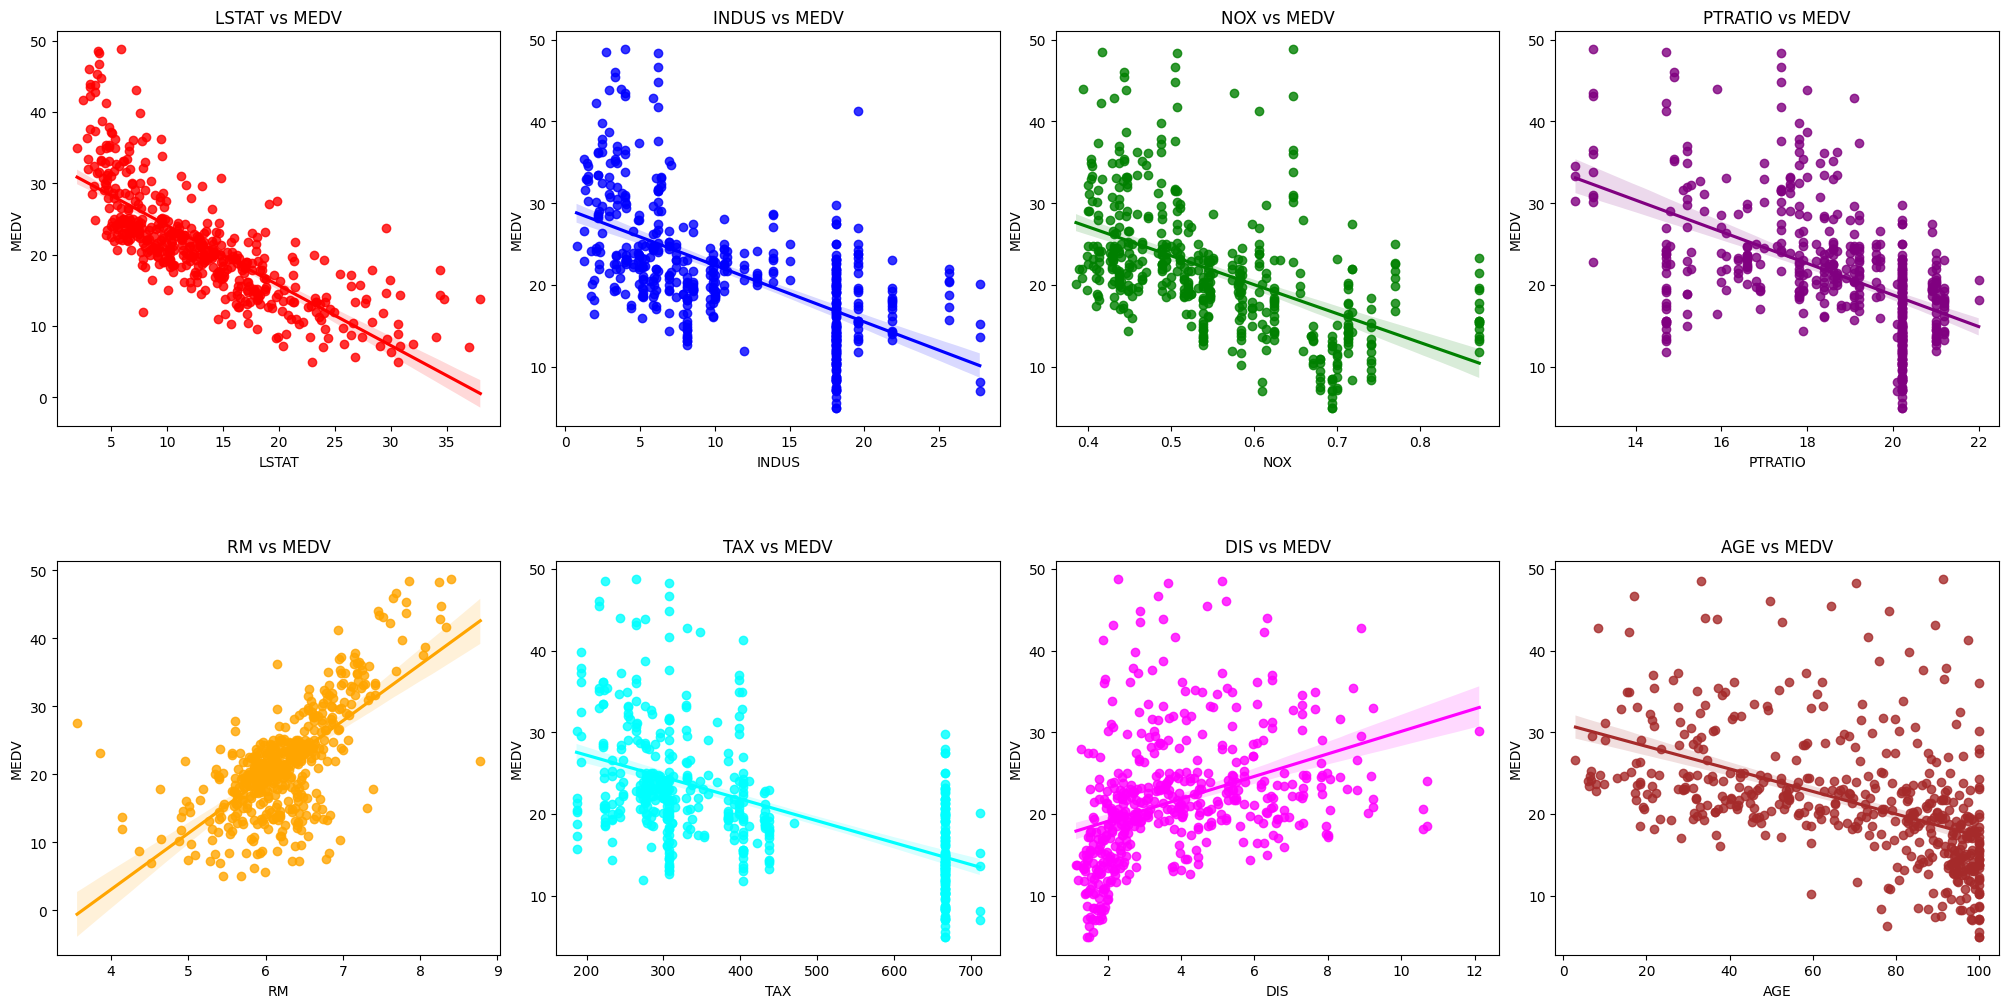

In [59]:
colors = ["red", "blue", "green", "purple", "orange", "cyan", "magenta", "brown"]
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x = data.loc[:,column_sels]
y = data['MEDV']

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i], color=colors[i])
    axs[i].set_title(f"{k} vs MEDV") 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Feature Engineering & Preprocessing

### Spliting target variable and independent variables

In [60]:
# Spliting target variable and independent variables
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

### Splitting to training and testing data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Remove the skewness of the data trough log transformation.

In [62]:
# Create copies to avoid modifying the original split data
x_train_log = X_train.copy()
x_test_log = X_test.copy()

skewed_features = ['CRIM', 'ZN', 'LSTAT','DIS','NOX']

for feature in skewed_features:
    # Use np.log1p on the original positive values
    x_train_log[feature] = np.log1p(x_train_log[feature])
    x_test_log[feature] = np.log1p(x_test_log[feature])

### Feature Scaling (Standardization)

Since features have different scales (CRIM up to 80, ZN up to 100, PTRATIO ~20), scaling is needed.


In [63]:
numerical_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
categorical_cols = ['CHAS']
scaler = StandardScaler()

# Fit the scaler ONLY on the transformed training data's numerical columns
scaler.fit(x_train_log[numerical_cols])

# Transform both the log-transformed training and test sets
x_train_scaled_numerical = scaler.transform(x_train_log[numerical_cols])
x_test_scaled_numerical = scaler.transform(x_test_log[numerical_cols])

# --- Step 4: Reconstruct the Final DataFrames ---
# Convert scaled arrays back to DataFrames
x_train_scaled_df = pd.DataFrame(x_train_scaled_numerical, columns=numerical_cols, index = X_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled_numerical, columns=numerical_cols, index = X_test.index)

# Combine with the untouched categorical feature
x_train_final_log = pd.concat([x_train_scaled_df, X_train[categorical_cols]], axis=1)
x_test_final_log = pd.concat([x_test_scaled_df, X_test[categorical_cols]], axis=1)

<Axes: >

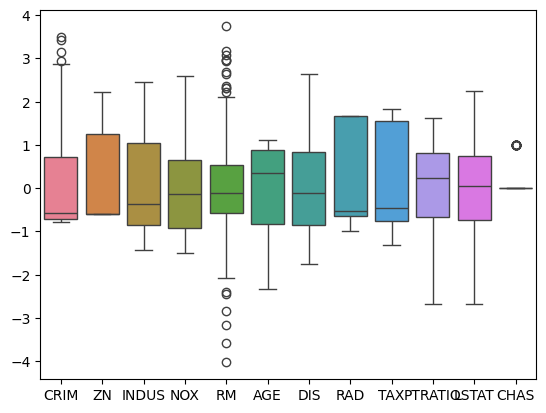

In [64]:
sns.boxplot(x_train_final_log)

## Binning 

In [65]:
features_to_bin = ['CRIM', 'ZN', 'RAD', 'TAX','INDUS','DIS']
bin_labels = ['low', 'high']

# Create copies starting from the correct DataFrames
x_train_binned = x_train_final_log.copy()
x_test_binned = x_test_final_log.copy()

for feature in features_to_bin:
    # --- Robust Binning Logic ---
    # Find the median of only the non-minimum values in the training set
    split_point = x_train_binned[x_train_binned[feature] > x_train_binned[feature].min()][feature].median()

    # Define the bin edges manually using this split point
    bins = [x_train_binned[feature].min() - 0.1, split_point, x_train_binned[feature].max() + 0.1]

    # Use pd.cut with our manually defined bins
    x_train_binned[f'{feature}_bin'] = pd.cut(x_train_binned[feature], bins=bins, labels=bin_labels, include_lowest=True)
    x_test_binned[f'{feature}_bin'] = pd.cut(x_test_binned[feature], bins=bins, labels=bin_labels, include_lowest=True)

    # Fill any potential NaNs
    x_train_binned[f'{feature}_bin'] = x_train_binned[f'{feature}_bin'].fillna(bin_labels[0])
    x_test_binned[f'{feature}_bin'] = x_test_binned[f'{feature}_bin'].fillna(bin_labels[0])



### One-Hot Encoding

In [66]:

# --- Step 2: One-Hot Encoding ---
features_to_encode = ['CHAS'] + [f'{feature}_bin' for feature in features_to_bin]

x_train_encoded = pd.get_dummies(x_train_binned, columns=features_to_encode, drop_first=True)
x_test_encoded = pd.get_dummies(x_test_binned, columns=features_to_encode, drop_first=True)



### Column Alignment

In [67]:
train_cols = x_train_encoded.columns
test_cols = x_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    x_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    x_train_encoded[c] = 0

x_test_encoded = x_test_encoded[x_train_encoded.columns]

In [68]:

# --- Step 4: Drop Original Columns ---
x_train_final = x_train_encoded.drop(columns=features_to_bin)
x_test_final = x_test_encoded.drop(columns=features_to_bin)


# We are now ready for modeling
print("Final Processed Training Set Head:")
x_train_final.head()

Final Processed Training Set Head:


,NOX,RM,AGE,PTRATIO,LSTAT,CHAS_1,CRIM_bin_high,ZN_bin_high,RAD_bin_high,TAX_bin_high,INDUS_bin_high,DIS_bin_high
336,-0.310974,-0.593288,-0.794389,0.807013,-0.213248,False,False,False,False,False,False,True
140,0.646473,-0.139409,0.878420,1.266421,1.409103,False,True,False,False,True,True,False
449,1.381735,0.222205,1.044639,0.807013,0.998307,False,True,False,True,True,True,False
432,0.302794,0.234110,0.213540,0.807013,0.146838,False,True,False,True,True,True,False
504,0.206760,0.783229,0.726346,1.174540,-0.917877,False,False,False,False,False,True,False


### Convert all boolean columns to integers (0s and 1s)


In [69]:
for col in x_train_final.columns:
    if x_train_final[col].dtype == 'bool':
        x_train_final[col] = x_train_final[col].astype(int)
        x_test_final[col] = x_test_final[col].astype(int)

# Display the head to confirm the change
print("DataFrame after converting booleans to integers:")
x_train_final.head()

DataFrame after converting booleans to integers:


,NOX,RM,AGE,PTRATIO,LSTAT,CHAS_1,CRIM_bin_high,ZN_bin_high,RAD_bin_high,TAX_bin_high,INDUS_bin_high,DIS_bin_high
336,-0.310974,-0.593288,-0.794389,0.807013,-0.213248,0,0,0,0,0,0,1
140,0.646473,-0.139409,0.878420,1.266421,1.409103,0,1,0,0,1,1,0
449,1.381735,0.222205,1.044639,0.807013,0.998307,0,1,0,1,1,1,0
432,0.302794,0.234110,0.213540,0.807013,0.146838,0,1,0,1,1,1,0
504,0.206760,0.783229,0.726346,1.174540,-0.917877,0,0,0,0,0,1,0


### Observations & Inferences – Preprocessing
- Log transformation reduced skewness for CRIM, LSTAT, DIS, and NOX, improving feature distribution.
- Standardization ensured all features are on the same scale, crucial for regression models.
- Binning and encoding introduced categorical-like features (low/high groups), enriching model interpretability.
- One-hot encoding was applied for categorical variables (CHAS, bins).

**Inference**: Preprocessing steps improved data quality, reduced skewness, and prepared the dataset for modeling.


# Model Training - Linear Regression

In [70]:
# Create a Linear regressor
model = LinearRegression()

# Train the model using the training sets 
model.fit(x_train_final,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Make Predictions

In [71]:
y_pred=model.predict(x_test_final)

### Evaluate the Model

In [72]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred) 

print("Linear Regression Model Performance")
print(f"Mean Squared Error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R2 Square: {r2}")

Linear Regression Model Performance
Mean Squared Error: 11.382544435677074
Root mean squared error: 3.373802666973437
R2 Square: 0.7771857715735163


## Results & Conclusion

### Key Results:
- Linear Regression achieved:
  - **MSE:** 11.38  
  - **RMSE:** 3.37  
  - **R² Score:** 0.78  

### Conclusion:
- The model explains about **78% of the variance** in house prices, which is quite good for a simple regression model.  
- On average, the predictions differ from the actual prices by ~$3,370.  
- The model works well for capturing **overall trends** in the dataset but struggles slightly with **outliers** and **non-linear patterns**.  

